In [1]:
import numpy as np 
import pandas as pd 
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
#from statsmodels.stats.outliers_influence import variance_inflation_factor


In [2]:
# RACHEL
df_prepared = pd.read_csv("../data/df_prepared.csv", index_col=0)
df_prepared.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left_binned,duration_sqrt,price
0,-1.368800,-1.732372,0.198274,-2.4911,0.236474,0.37094,-0.674351,2.375914,-1.742522,5953.0
1,-1.368800,-1.732372,-0.298600,-2.4911,0.445839,0.37094,-0.674351,2.375914,-1.691940,5953.0
2,-1.562898,-1.732372,-0.298600,-2.4911,-2.002790,0.37094,-0.674351,2.375914,-1.742522,5956.0
3,0.885018,-1.732372,0.469739,-2.4911,-0.820969,0.37094,-0.674351,2.375914,-1.717006,5955.0
4,0.885018,-1.732372,0.469739,-2.4911,0.445839,0.37094,-0.674351,2.375914,-1.691940,5955.0


In [3]:
# RACHEL 
X = df_prepared.drop('price', axis=1)
X.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left_binned,duration_sqrt
0,-1.368800,-1.732372,0.198274,-2.4911,0.236474,0.37094,-0.674351,2.375914,-1.742522
1,-1.368800,-1.732372,-0.298600,-2.4911,0.445839,0.37094,-0.674351,2.375914,-1.691940
2,-1.562898,-1.732372,-0.298600,-2.4911,-2.002790,0.37094,-0.674351,2.375914,-1.742522
3,0.885018,-1.732372,0.469739,-2.4911,-0.820969,0.37094,-0.674351,2.375914,-1.717006
4,0.885018,-1.732372,0.469739,-2.4911,0.445839,0.37094,-0.674351,2.375914,-1.691940


In [32]:
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

#check for issue with multicollinearity -> dont have (benchmark >= 5)

            feature       VIF
0           airline  1.499783
1       source_city  1.079051
2    departure_time  1.036798
3             stops  1.558686
4      arrival_time  1.074553
5  destination_city  1.096754
6             class  1.256327
7  days_left_binned  1.004452
8     duration_sqrt  1.799448


array([[<AxesSubplot:title={'center':'airline'}>,
        <AxesSubplot:title={'center':'source_city'}>,
        <AxesSubplot:title={'center':'departure_time'}>],
       [<AxesSubplot:title={'center':'stops'}>,
        <AxesSubplot:title={'center':'arrival_time'}>,
        <AxesSubplot:title={'center':'destination_city'}>],
       [<AxesSubplot:title={'center':'class'}>,
        <AxesSubplot:title={'center':'days_left_binned'}>,
        <AxesSubplot:title={'center':'duration_sqrt'}>],
       [<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'normalised_price'}>,
        <AxesSubplot:>]], dtype=object)

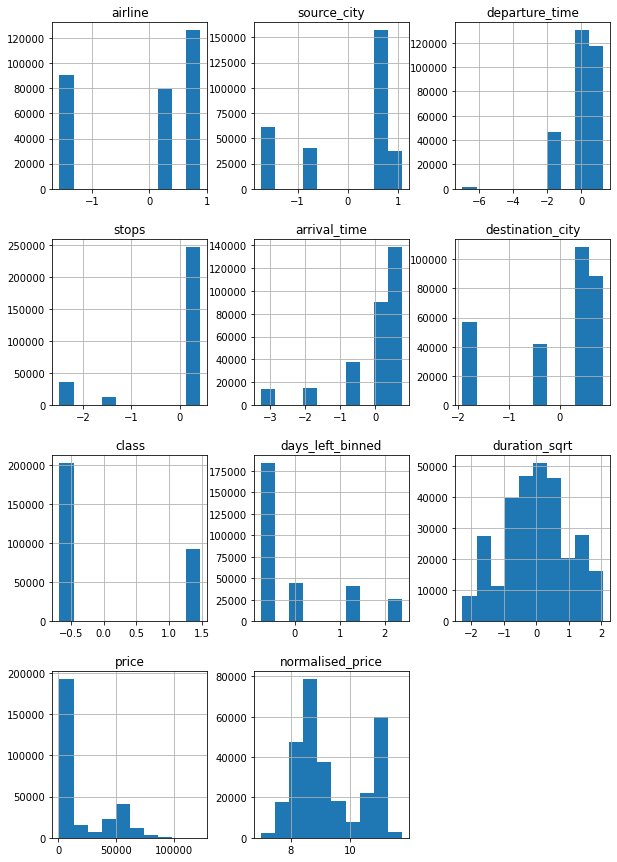

In [4]:
# RACHEL 
df_prepared['normalised_price'] = np.log(df_prepared['price'])
df_prepared.hist(figsize=(10,15))

In [5]:
# RACHEL 
y = df_prepared['normalised_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
# RACHEL 
rfr = RandomForestRegressor(random_state = 42, oob_score = True)

Randomised Search CV Tuning

In [23]:
# RACHEL 
from sklearn.model_selection import RandomizedSearchCV



# define the hyperparameter space
param_dist = {"n_estimators": np.arange(241,350,10),
              "max_depth": [24],
              "min_samples_split": [4],
              "min_samples_leaf": [14]}


# create the random search object
random_search = RandomizedSearchCV(rfr, param_distributions=param_dist, 
n_iter=30, cv=3, n_jobs=-1)

# fit the random search object to the data
random_search.fit(X_train, y_train)

# get the best set of hyperparameters
best_params = random_search.best_params_



C:\Users\limra\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 11 is smaller than n_iter=30. Running 11 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [24]:
# RACHEL
print(best_params)

{'n_estimators': 341, 'min_samples_split': 4, 'min_samples_leaf': 14, 'max_depth': 24}


In [25]:
# RACHEL 

# train the model using the best set of hyperparameters
best_rfr=RandomForestRegressor(random_state = 42, oob_score = True, n_estimators = best_params["n_estimators"], max_depth=best_params["max_depth"],
min_samples_leaf=best_params["min_samples_leaf"], min_samples_split=best_params["min_samples_split"])

best_rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=24, min_samples_leaf=14, min_samples_split=4,
                      n_estimators=341, oob_score=True, random_state=42)

In [26]:
# RACHEL 
y_pred = best_rfr.predict(X_test)
original_y_pred = np.exp(y_pred)
original_y_test = np.exp(y_test)

In [27]:
# RACHEL 
mean_absolute_percentage_error=metrics.mean_absolute_percentage_error(original_y_test, original_y_pred) 
mse=metrics.mean_squared_error(original_y_test, original_y_pred) 
r2=metrics.r2_score(original_y_test, original_y_pred)
adjustedr2 = 1 - (1-r2) * (len(y)-1)/(len(y)-X.shape[1]-1)


metric_results = {'Metric': ['R2 Score', 'Adjusted R2 Score','Root Mean Squared Error (RMSE)', 'Mean Absolute Percentage Error (MAPE)'],
        'Value': [round(r2, 5),round(adjustedr2, 5), round(np.sqrt(mse), 5), round(mean_absolute_percentage_error, 5)]}

df_metric = pd.DataFrame(metric_results)

print(df_metric)

                                  Metric       Value
0                               R2 Score     0.90223
1                      Adjusted R2 Score     0.90223
2         Root Mean Squared Error (RMSE)  7098.19557
3  Mean Absolute Percentage Error (MAPE)     0.26243


Log-transformed price (price has a normal distribution now), without tuning

In [33]:
X = df_final.drop('price', axis=1)
y = df_prepared['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [53]:
rfr = RandomForestRegressor(random_state = 42)
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [54]:
y_pred = rfr.predict(X_test)

In [57]:
y_pred

array([10.63551626, 11.12648468,  8.52328228, ...,  8.87095445,
        8.18701913, 10.87667254])

In [59]:
# inverse log of y_pred to get predicted price back 
original_y_pred = np.exp(y_pred)
original_y_pred

array([41585.89240917, 67947.09602895,  5030.53830313, ...,
        7122.07539422,  3593.99304532, 52927.19346737])

In [60]:
original_y_test = np.exp(y_test)
original_y_test

219902    37668.0
267712    68415.0
177429     6287.0
84097     10744.0
98208      4819.0
           ...   
101237     6568.0
203696    12288.0
199265     5095.0
48693      3681.0
211730    53164.0
Name: normalised_price, Length: 59138, dtype: float64

In [61]:
mean_absolute_percentage_error=metrics.mean_absolute_percentage_error(original_y_test, original_y_pred) 
mse=metrics.mean_squared_error(original_y_test, original_y_pred) 
r2=metrics.r2_score(original_y_test, original_y_pred)
adjustedr2 = 1 - (1-r2) * (len(y)-1)/(len(y)-X.shape[1]-1)


metric_results = {'Metric': ['R2 Score', 'Adjusted R2 Score','Root Mean Squared Error (RMSE)', 'Mean Absolute Percentage Error (MAPE)'],
        'Value': [round(r2, 5),round(adjustedr2, 5), round(np.sqrt(mse), 5), round(mean_absolute_percentage_error, 5)]}

df_metric = pd.DataFrame(metric_results)

print(df_metric)

                                  Metric       Value
0                               R2 Score     0.88484
1                      Adjusted R2 Score     0.88484
2         Root Mean Squared Error (RMSE)  7688.25132
3  Mean Absolute Percentage Error (MAPE)     0.26632


Untouched Price, no tuning

In [4]:
#X = df_final.drop('price', axis=1)
y = df_prepared['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
rfr = RandomForestRegressor(random_state = 42, oob_score = True)
rfr.fit(X_train, y_train)

RandomForestRegressor(oob_score=True, random_state=42)

In [11]:
y_pred = rfr.predict(X_test)


In [20]:
mean_absolute_percentage_error=metrics.mean_absolute_percentage_error(y_test, y_pred) 
mse=metrics.mean_squared_error(y_test, y_pred) 
r2=metrics.r2_score(y_test, y_pred)
adjustedr2 = 1 - (1-r2) * (len(y)-1)/(len(y)-X.shape[1]-1)


metric_results = {'Metric': ['R2 Score', 'Adjusted R2 Score','Root Mean Squared Error (RMSE)', 'Mean Absolute Percentage Error (MAPE)'],
        'Value': [round(r2, 5),round(adjustedr2, 5), round(np.sqrt(mse), 5), round(mean_absolute_percentage_error, 5)]}

df_metric = pd.DataFrame(metric_results)

print(df_metric)

                                  Metric       Value
0                               R2 Score     0.90688
1                      Adjusted R2 Score     0.90687
2         Root Mean Squared Error (RMSE)  6904.00135
3  Mean Absolute Percentage Error (MAPE)     0.29871


In [17]:
# RACHEL 
from sklearn.model_selection import RandomizedSearchCV



# define the hyperparameter space
param_dist = {"n_estimators": np.arange(145,400),
              "max_depth":np.arange(18,30),
              "min_samples_split": np.arange(7,20),
              "min_samples_leaf": np.arange(17,30)}


# create the random search object
random_search = RandomizedSearchCV(rfr, param_distributions=param_dist, 
n_iter=30, cv=5, n_jobs=-1)

# fit the random search object to the data
random_search.fit(X_train, y_train)

# get the best set of hyperparameters
best_params = random_search.best_params_

In [18]:
# RACHEL
print(best_params)

{'n_estimators': 398, 'min_samples_split': 15, 'min_samples_leaf': 19, 'max_depth': 28}


In [19]:
# train the model using the best set of hyperparameters
best_rfr=RandomForestRegressor(random_state = 42, oob_score = True, n_estimators = best_params["n_estimators"], max_depth=best_params["max_depth"],
min_samples_leaf=best_params["min_samples_leaf"], min_samples_split=best_params["min_samples_split"])

best_rfr.fit(X_train, y_train)
y_pred = best_rfr.predict(X_test)

Without tuning: 
<li>Adjusted R2 still okay without tuning</li>
<li>RMSE means model is about 7610 indian currency off from actual</li>
<li>MAPE is scale independent, which is a good measure for us. 0.301 means about 30% off</li> 

<li>The scatter plot below compares the actual with the predicted. The closer the points are to a straight line, the better the model’s prediction</li>
<li>The Residual Plot below shows the residuals (differences between the predicted and actual) against the predicted values. A well-performing model will have residuals scattered randomly around zero (the red dashed line).</li>

https://dooinnkim.medium.com/how-to-plot-predicted-vs-actual-graphs-and-residual-plots-dc4e5b3f304a

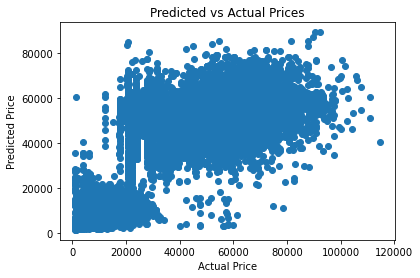

In [38]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Predicted vs Actual Prices')
plt.show()

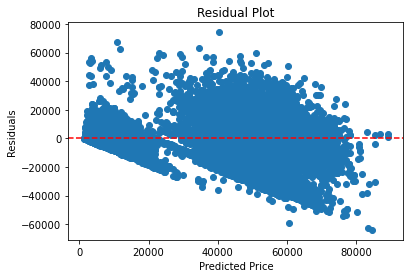

In [39]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()